In [2]:
# ==========================================================
# DS620 Team Project - AudioMNIST Deep Learning
# Setup and Imports (Jan's Environment)
# ==========================================================

# --- Core Python and OS utilities ---
import os               # for directory and file management
import sys              # for accessing system-level information
import pathlib          # for cross-platform path handling

# --- Numerical and data handling ---
import numpy as np      # numerical operations (arrays, signal processing)
import pandas as pd     # data manipulation and organization

# --- Visualization ---
import matplotlib.pyplot as plt  # visualizations for audio signals and spectrograms

# --- Audio processing ---
import librosa          # audio loading, feature extraction, and transformation
import librosa.display  # visualization support for audio data

# --- Deep learning framework ---
import tensorflow as tf                             # main ML/DL framework
from tensorflow.keras import layers, models         # used for CNN and RNN architectures

In [7]:
# ==========================================================
# Directory Setup (Local Paths)
# ==========================================================

# Define project directories
BASE_DIR = pathlib.Path(r"C:\Users\JanMc\Dropbox\Education\_GitHub_coursework\janmcconnellCityU-coursework\DS620_Team_Project")
DATA_DIR = BASE_DIR / "data" / "raw"                   # location of raw AudioMNIST files
SPECT_DIR = BASE_DIR / "data" / "spectrograms"         # folder for generated spectrograms
PROC_DIR = BASE_DIR / "data" / "processed"             # folder for processed/feature data
VISUAL_DIR = BASE_DIR / "collab" / "jan" / "visualizations"  # folder for saved visual outputs

# Create directories if they don't exist
for d in [SPECT_DIR, PROC_DIR, VISUAL_DIR]:
    d.mkdir(parents=True, exist_ok=True)

# Verify data directory
if DATA_DIR.exists():
    wav_files = list(DATA_DIR.rglob("*.wav"))
    print(f"✅ Data directory found: {DATA_DIR}")
    print(f"📁 Contains {len(wav_files)} audio files.")
else:
    print(f"⚠️ Data directory not found: {DATA_DIR}")

# Confirm visualization output path
print(f"📊 Visualizations will be saved to: {VISUAL_DIR}")

✅ Data directory found: C:\Users\JanMc\Dropbox\Education\_GitHub_coursework\janmcconnellCityU-coursework\DS620_Team_Project\data\raw
📁 Contains 30000 audio files.
📊 Visualizations will be saved to: C:\Users\JanMc\Dropbox\Education\_GitHub_coursework\janmcconnellCityU-coursework\DS620_Team_Project\collab\jan\visualizations


🎵 Selected sample: 7_14_33.wav
📈 Audio loaded | Duration: 0.64s | Sampling Rate: 48000 Hz


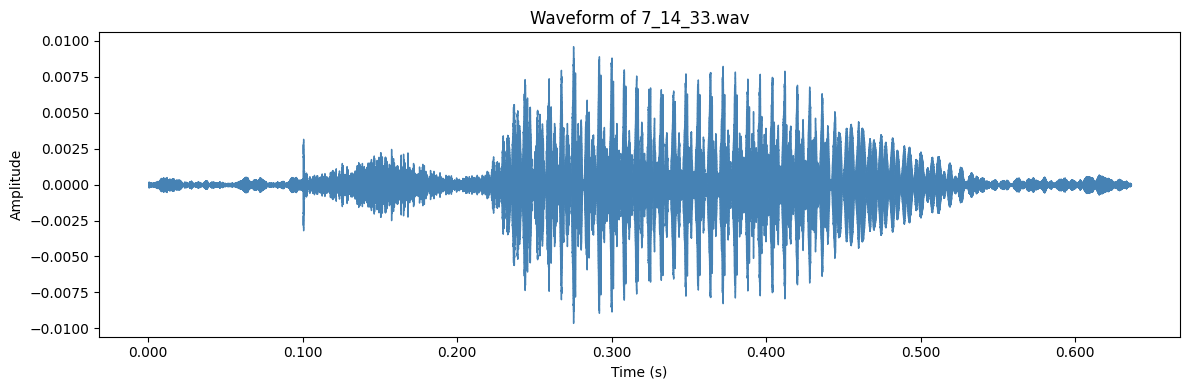

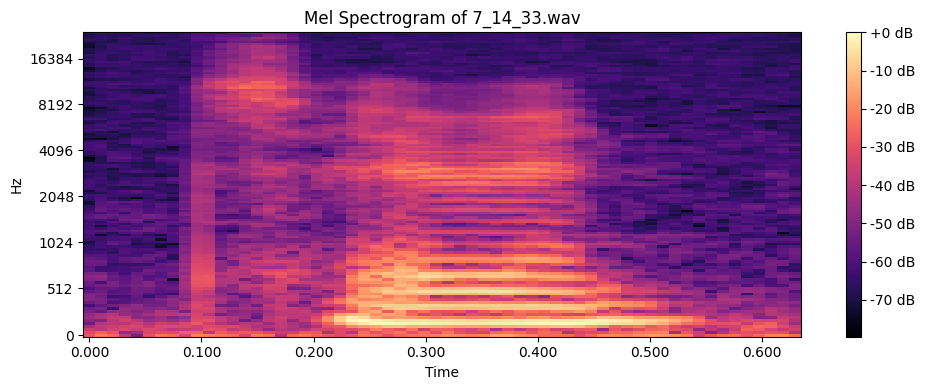

✅ Spectrogram saved to: C:\Users\JanMc\Dropbox\Education\_GitHub_coursework\janmcconnellCityU-coursework\DS620_Team_Project\collab\jan\visualizations\7_14_33_mel_spectrogram.png


In [ ]:
# ==========================================================
# Load and Visualize a Sample Audio File
# ==========================================================

import random  # for selecting a random file

# --- Step 1: Randomly select one audio file ---
sample_file = random.choice(wav_files)
print(f"🎵 Selected sample: {sample_file.name}")

# --- Step 2: Load the audio using librosa ---
# sr=None ensures the original sampling rate is preserved
y, sr = librosa.load(sample_file, sr=None)
print(f"📈 Audio loaded | Duration: {librosa.get_duration(y=y, sr=sr):.2f}s | Sampling Rate: {sr} Hz")

# --- Step 3: Plot the waveform ---
plt.figure(figsize=(12, 4))
librosa.display.waveshow(y, sr=sr, color='steelblue')
plt.title(f"Waveform of {sample_file.name}")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.tight_layout()
plt.show()

# --- Step 4: Compute the spectrogram (Mel-scaled) ---
S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128, fmax=8000)
S_dB = librosa.power_to_db(S, ref=np.max)  # Convert to decibel scale

# --- Step 5: Visualize and save the spectrogram ---
plt.figure(figsize=(10, 4))
librosa.display.specshow(S_dB, sr=sr, x_axis='time', y_axis='mel', cmap='magma')
plt.colorbar(format='%+2.0f dB')
plt.title(f"Mel Spectrogram of {sample_file.name}")
plt.tight_layout()

# Create save path and export
save_path = VISUAL_DIR / f"{sample_file.stem}_mel_spectrogram.png"
plt.savefig(save_path, dpi=150, bbox_inches='tight')
plt.show()

print(f"✅ Spectrogram saved to: {save_path}")


=== Selected files ===
1. C:\Users\JanMc\Dropbox\Education\_GitHub_coursework\janmcconnellCityU-coursework\DS620_Team_Project\data\raw\data\36\7_36_37.wav  |  digit=7, speaker=36, index=37
2. C:\Users\JanMc\Dropbox\Education\_GitHub_coursework\janmcconnellCityU-coursework\DS620_Team_Project\data\raw\data\55\7_55_8.wav  |  digit=7, speaker=55, index=8
3. C:\Users\JanMc\Dropbox\Education\_GitHub_coursework\janmcconnellCityU-coursework\DS620_Team_Project\data\raw\data\18\6_18_0.wav  |  digit=6, speaker=18, index=0



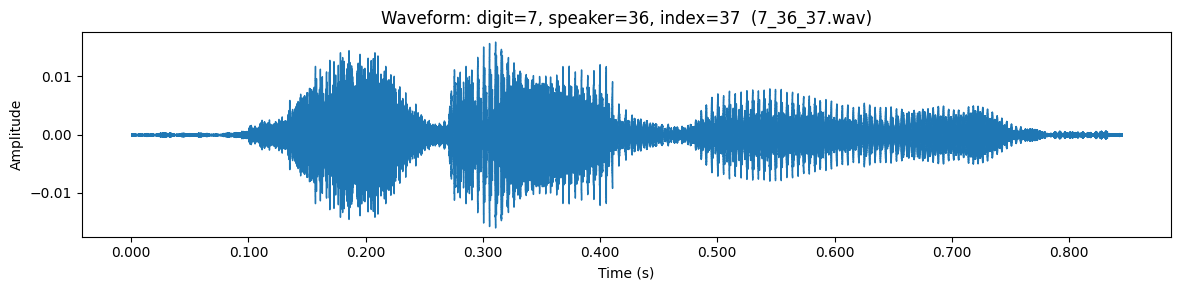

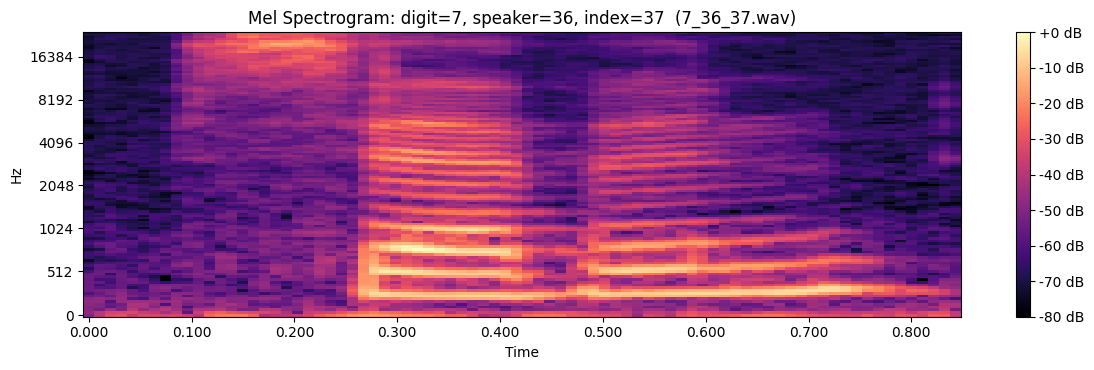

✅ Saved waveform → C:\Users\JanMc\Dropbox\Education\_GitHub_coursework\janmcconnellCityU-coursework\DS620_Team_Project\collab\jan\visualizations\samples\7_36_37_waveform.png
✅ Saved spectrogram → C:\Users\JanMc\Dropbox\Education\_GitHub_coursework\janmcconnellCityU-coursework\DS620_Team_Project\collab\jan\visualizations\samples\7_36_37_mel_spectrogram.png
ℹ️  File: C:\Users\JanMc\Dropbox\Education\_GitHub_coursework\janmcconnellCityU-coursework\DS620_Team_Project\data\raw\data\36\7_36_37.wav | Duration: 0.85s | SR: 48000 Hz



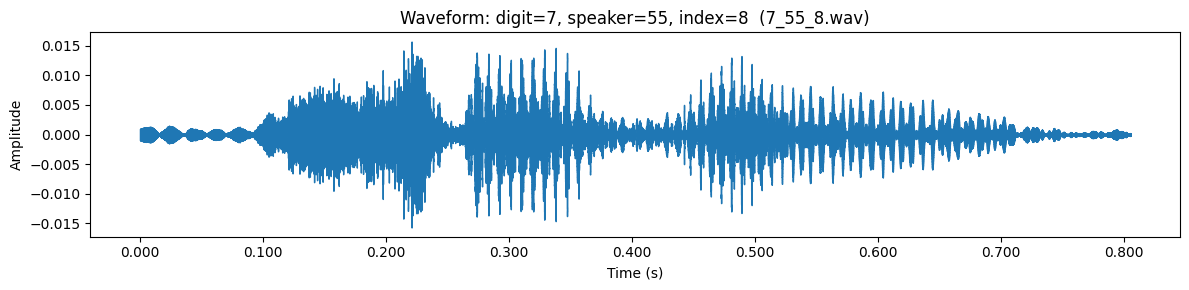

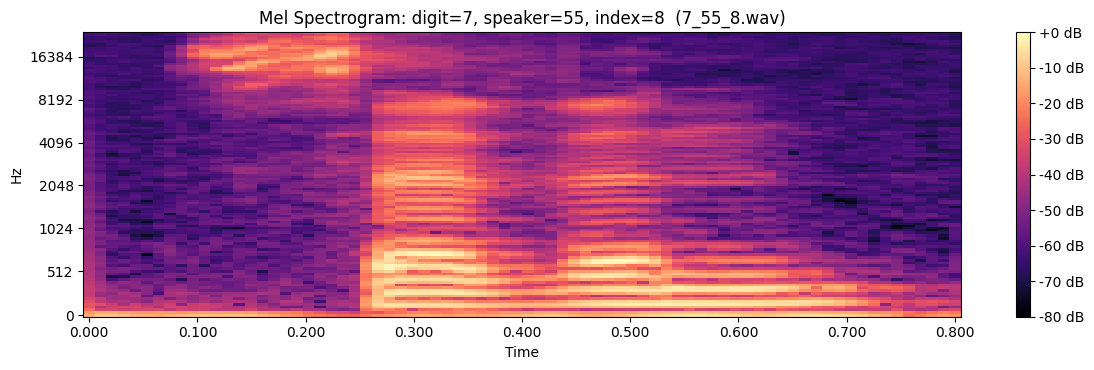

✅ Saved waveform → C:\Users\JanMc\Dropbox\Education\_GitHub_coursework\janmcconnellCityU-coursework\DS620_Team_Project\collab\jan\visualizations\samples\7_55_8_waveform.png
✅ Saved spectrogram → C:\Users\JanMc\Dropbox\Education\_GitHub_coursework\janmcconnellCityU-coursework\DS620_Team_Project\collab\jan\visualizations\samples\7_55_8_mel_spectrogram.png
ℹ️  File: C:\Users\JanMc\Dropbox\Education\_GitHub_coursework\janmcconnellCityU-coursework\DS620_Team_Project\data\raw\data\55\7_55_8.wav | Duration: 0.81s | SR: 48000 Hz



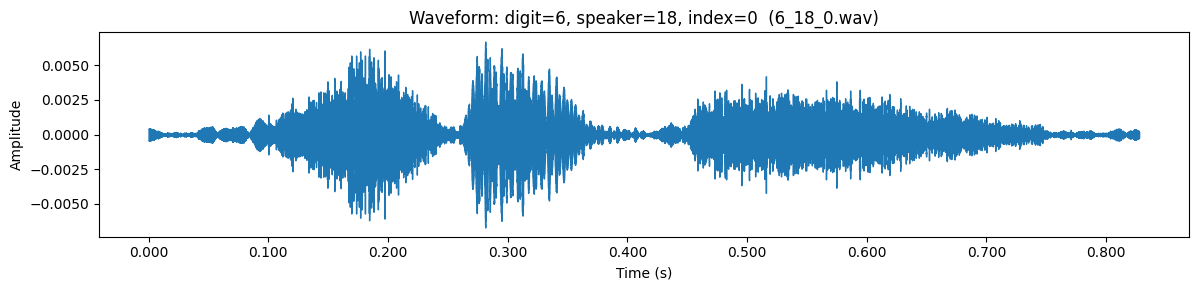

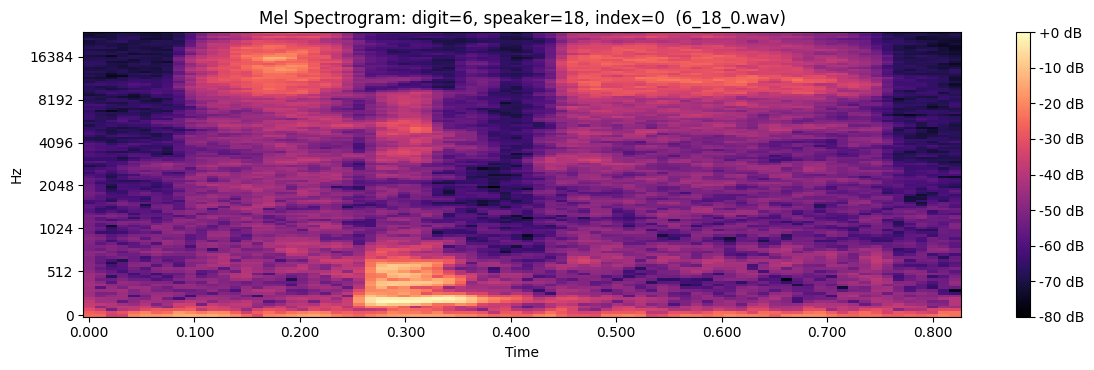

✅ Saved waveform → C:\Users\JanMc\Dropbox\Education\_GitHub_coursework\janmcconnellCityU-coursework\DS620_Team_Project\collab\jan\visualizations\samples\6_18_0_waveform.png
✅ Saved spectrogram → C:\Users\JanMc\Dropbox\Education\_GitHub_coursework\janmcconnellCityU-coursework\DS620_Team_Project\collab\jan\visualizations\samples\6_18_0_mel_spectrogram.png
ℹ️  File: C:\Users\JanMc\Dropbox\Education\_GitHub_coursework\janmcconnellCityU-coursework\DS620_Team_Project\data\raw\data\18\6_18_0.wav | Duration: 0.83s | SR: 48000 Hz



In [9]:
# ==========================================================
# Visualize & Save Waveform + Mel Spectrogram for 3 Samples
# ==========================================================
import random
from pathlib import Path

# Make a subfolder for these samples to keep things tidy
SAMPLES_DIR = VISUAL_DIR / "samples"
SAMPLES_DIR.mkdir(parents=True, exist_ok=True)

def parse_filename(p: Path):
    """
    Parse filename of form '{digit}_{speakerID}_{index}.wav'
    Returns (digit:int, speaker:str, index:int). Falls back
    gracefully if the pattern is unexpected.
    """
    stem = p.stem  # e.g., '7_14_33'
    parts = stem.split("_")
    digit = parts[0] if len(parts) > 0 else "?"
    speaker = parts[1] if len(parts) > 1 else "?"
    index = parts[2] if len(parts) > 2 else "?"
    # coerce to int when possible
    try: digit = int(digit)
    except: pass
    try: index = int(index)
    except: pass
    return digit, str(speaker), index

# Choose 3 distinct random files from the full list we built earlier
# (wav_files was created in your directory-setup cell via DATA_DIR.rglob("*.wav"))
assert len(wav_files) >= 3, "Need at least 3 audio files to sample."
sample_paths = random.sample(wav_files, 3)

print("=== Selected files ===")
for i, p in enumerate(sample_paths, 1):
    digit, speaker, idx = parse_filename(p)
    print(f"{i}. {p}  |  digit={digit}, speaker={speaker}, index={idx}")
print("======================\n")

for p in sample_paths:
    # -------- Load audio --------
    y, sr = librosa.load(p, sr=None)  # keep native sample rate
    duration = librosa.get_duration(y=y, sr=sr)
    digit, speaker, idx = parse_filename(p)

    # -------- Waveform (plot + save) --------
    plt.figure(figsize=(12, 3))
    librosa.display.waveshow(y, sr=sr)
    plt.title(f"Waveform: digit={digit}, speaker={speaker}, index={idx}  ({p.name})")
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")
    plt.tight_layout()
    wave_out = SAMPLES_DIR / f"{p.stem}_waveform.png"
    plt.savefig(wave_out, dpi=150, bbox_inches="tight")
    plt.show()

    # -------- Mel Spectrogram (plot + save) --------
    # Mel power spectrogram
    S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128, fmax=8000)
    S_dB = librosa.power_to_db(S, ref=np.max)

    plt.figure(figsize=(12, 3.8))
    librosa.display.specshow(S_dB, sr=sr, x_axis="time", y_axis="mel", cmap="magma")
    plt.colorbar(format="%+2.0f dB")
    plt.title(f"Mel Spectrogram: digit={digit}, speaker={speaker}, index={idx}  ({p.name})")
    plt.tight_layout()
    spec_out = SAMPLES_DIR / f"{p.stem}_mel_spectrogram.png"
    plt.savefig(spec_out, dpi=150, bbox_inches="tight")
    plt.show()

    print(f"✅ Saved waveform → {wave_out}")
    print(f"✅ Saved spectrogram → {spec_out}")
    print(f"ℹ️  File: {p} | Duration: {duration:.2f}s | SR: {sr} Hz\n")

In [11]:
# ==========================================================
# Metadata Summary Table for Selected Audio Samples (with Amplitude Stats)
# ==========================================================
import pandas as pd
import numpy as np

metadata_records = []

for p in sample_paths:
    # Load the audio
    y, sr = librosa.load(p, sr=None)
    duration = librosa.get_duration(y=y, sr=sr)
    digit, speaker, idx = parse_filename(p)

    # Compute amplitude statistics
    amp_min = np.min(y)
    amp_max = np.max(y)
    amp_mean = np.mean(y)
    rms = np.sqrt(np.mean(np.square(y)))  # Root Mean Square energy

    # Build relative path (from project root)
    rel_path = p.relative_to(BASE_DIR)

    # File paths for images (relative for readability)
    waveform_file = Path("collab/jan/visualizations/samples") / f"{p.stem}_waveform.png"
    spectrogram_file = Path("collab/jan/visualizations/samples") / f"{p.stem}_mel_spectrogram.png"

    metadata_records.append({
        "Filename": p.name,
        "Relative Path": str(rel_path),
        "Digit": digit,
        "Speaker": speaker,
        "Index": idx,
        "Duration (s)": round(duration, 3),
        "Sample Rate (Hz)": sr,
        "Amp Min": round(amp_min, 5),
        "Amp Max": round(amp_max, 5),
        "Amp Mean": round(amp_mean, 5),
        "RMS Energy": round(rms, 5),
        "Waveform Image": str(waveform_file),
        "Spectrogram Image": str(spectrogram_file)
    })

# Create DataFrame
metadata_df = pd.DataFrame(metadata_records)

# Display as a clean table
display(
    metadata_df.style.hide(axis="index")
    .set_caption("Metadata Summary of Selected Audio Samples (with Amplitude Statistics)")
)

# Save table to CSV
metadata_csv_path = VISUAL_DIR / "samples" / "audio_metadata_summary.csv"
metadata_df.to_csv(metadata_csv_path, index=False)
print(f"✅ Metadata summary saved to: {metadata_csv_path}")

Filename,Relative Path,Digit,Speaker,Index,Duration (s),Sample Rate (Hz),Amp Min,Amp Max,Amp Mean,RMS Energy,Waveform Image,Spectrogram Image
7_36_37.wav,data\raw\data\36\7_36_37.wav,7,36,37,0.845000,48000,-0.015990,0.014530,-0.000010,0.003130,collab\jan\visualizations\samples\7_36_37_waveform.png,collab\jan\visualizations\samples\7_36_37_mel_spectrogram.png
7_55_8.wav,data\raw\data\55\7_55_8.wav,7,55,8,0.805000,48000,-0.015720,0.014650,-0.000000,0.002890,collab\jan\visualizations\samples\7_55_8_waveform.png,collab\jan\visualizations\samples\7_55_8_mel_spectrogram.png
6_18_0.wav,data\raw\data\18\6_18_0.wav,6,18,0,0.828000,48000,-0.006710,0.006200,-0.000010,0.001200,collab\jan\visualizations\samples\6_18_0_waveform.png,collab\jan\visualizations\samples\6_18_0_mel_spectrogram.png


✅ Metadata summary saved to: C:\Users\JanMc\Dropbox\Education\_GitHub_coursework\janmcconnellCityU-coursework\DS620_Team_Project\collab\jan\visualizations\samples\audio_metadata_summary.csv
